### Knife Edge Fit Notebook

In [1]:
%pylab inline
import pandas
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.special import erf
#plt.style.use('dark_background')


Populating the interactive namespace from numpy and matplotlib


#### Things to do ####

* Write some documentation on the logic of this
* better guessing of starting parameters: when & why does the fit fail?
* use pandas in a better way
* add more test-case plots
* improve usability: you want to add data entry after data entry to emulate working with this notebook in the lab
* save flags or not? if yes, save data in .csv
* how to make using this easier? 

### Fitting function
$$ P_{\text{meas}}=\frac{P_0}{2}\left[1\pm \text{erf}\left(\frac{\sqrt{2}(x-x_0)}{r}\right)\right]$$

In [5]:
def func_rising(x, power, x0, e2radius):
    return power/2*(1+erf(sqrt(2)*(x - x0)/e2radius))

def func_falling(x, power, x0, e2radius):
    return power/2*(1-erf(sqrt(2)*(x - x0)/e2radius))

### Example data

In [8]:
x = [5700,5775,5850,5925,6000,6075, 6150, 6225, 6300, 6375, 6450, 6525]
p = [2,1.98, 1.96, 1.87, 1.72, 1.39, 1.08, 0.76,0.467, 0.25, 0.114, 0.046]

In [4]:
x = [12,11.5,11,10.5,10,9.5,9,8.5,8,7.5,7,6.5,6,5.5,5,4.5,4,3.5,3]
p = [107.4,107.4,107.3,107,106.3,104.6,101,94,84.3,71.2,55.5,40.5,28,16.5,9.6,4.6,1.9,0.8,0.37]

In [59]:
# Maitai, 1024 nm, Bias 90V, Deep See at 61.32, Measurement on January 6th, 2017
x = [0,0.5,1,1.5,2,2.5,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
p = [36.4,36.3,36.3,36.3,36.3,36.3,36.3,36.2,36,35.6,34.7,33.3,31.0,27.8,23.4,18.1,12.9,8.8,5.38,3.1,1.47,0.65,0.24,0.06,0.07] 

In [6]:
# VECSEL, 1026 nm, Bias 150V, Measurement on January 6th, 2017
x = [0,0.5,1,1.5,2,2.5,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
p = [37.1,37.1,37.1,37.2,37.2,37.2,37.2,37.1,37.1,36.9,36.5,35.6,33.9,31.2,27.2,21.8,15.9,10.14,5.33,2.3,0.8,0.28,0.29,0.27,0.07] 

In [7]:
# here, pandas is used only for showing the plot
df = pandas.DataFrame({
    'Position': x, 'Intensity': p
   })
df

,Intensity,Position
0,37.10,0.0
1,37.10,0.5
2,37.10,1.0
3,37.20,1.5
4,37.20,2.0
5,37.20,2.5
6,37.20,3.0
7,37.10,4.0
8,37.10,5.0
9,36.90,6.0


In [8]:
# Guessing the fitting parameters
power_guess = np.max(p)
position_guess = 9
diameter_guess = 10
# and doing the fit
if p[0]<p[-1]:
    print("rising")
    popt, pcov = curve_fit(func_rising, x, p, p0=[power_guess,position_guess,diameter_guess])
else:
    print("falling")
    popt, pcov = curve_fit(func_falling, x, p, p0=[36,12,10])

falling


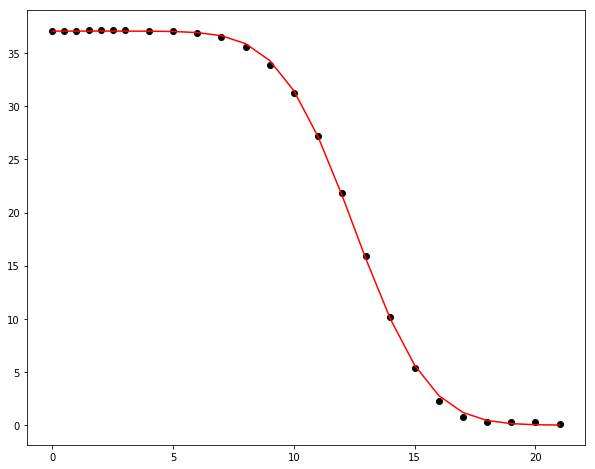

In [9]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)

ax.plot(x,p,'ko', label="Original Data")
ax.plot(x,func_falling(x, *popt), 'r-', label="Fitted Curve")


In [10]:
print("1/e^2-radius is: ", popt[2])
print("1/e^2-Diameter is: ", 2*popt[2])

1/e^2-radius is:  4.85659804876
1/e^2-Diameter is:  9.71319609752


        VECSEL:  1/e^2-radius is:  4.8565980487   /   1/e^2-Diameter is:  9.71319609752
        Maitai:  1/e^2-radius is:  5.69210823295 / 1/e^2-Diameter is:  11.3842164659
